<a href="https://colab.research.google.com/github/Harshitaa63/myprojects/blob/main/CV_preprocessing_20Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import cv2
from google.colab.patches import cv2_imshow

In [27]:
# read the image
img = cv2.imread('/content/img.jpg')

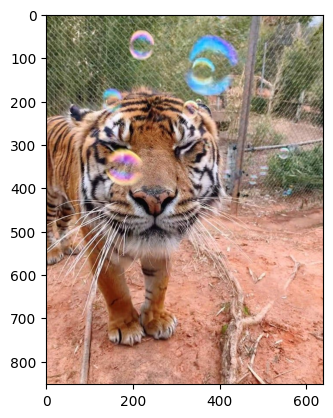

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# read and display image
img = mpimg.imread('/content/img.jpg')
plt.imshow(img)

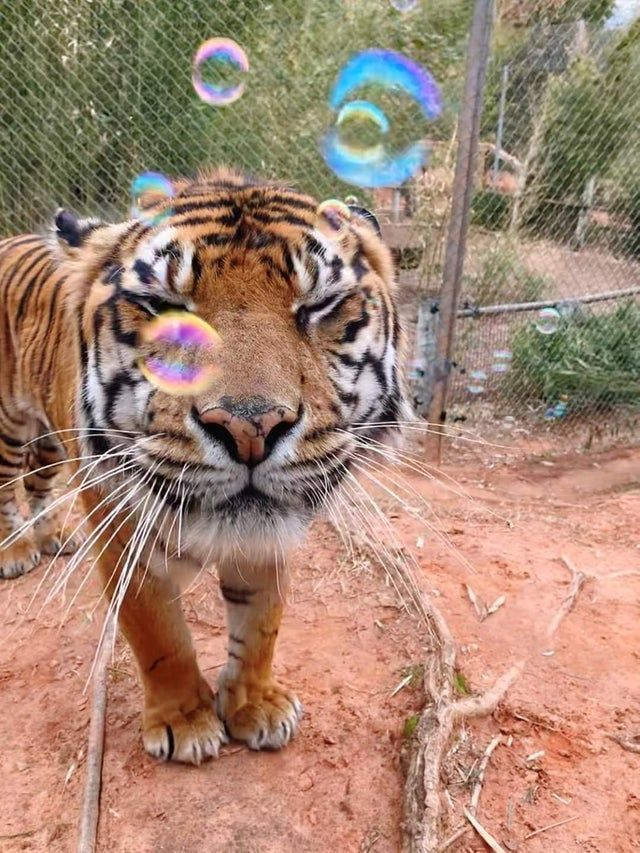

In [29]:
# convert to RGB  (it  ensure consistent color representation for processing, visualization or model input.)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# display
cv2_imshow(img)

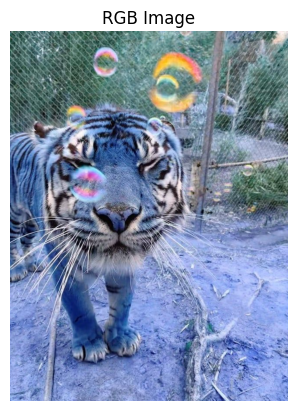

In [30]:
#display the image
plt.imshow(img)
plt.axis('off')
plt.title('RGB Image')
plt.show()

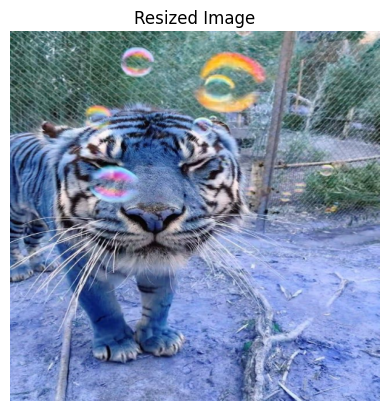

In [31]:
#resize image (it fits specific requirements for processing, model input, or display.)
img = cv2.resize(img, (500, 500))
# display the image
plt.imshow(img)
plt.axis('off')
plt.title('Resized Image')
plt.show()

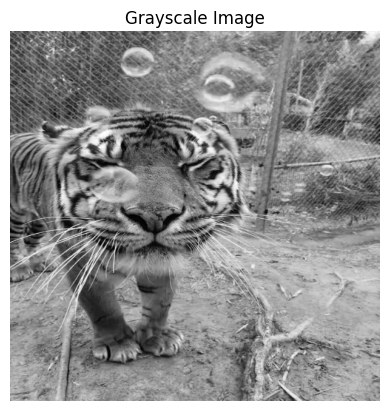

In [32]:
#convert to grayscale (reducing it to shades of gray, removing all color so each pixel only carries intensity information.)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# display the image
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()

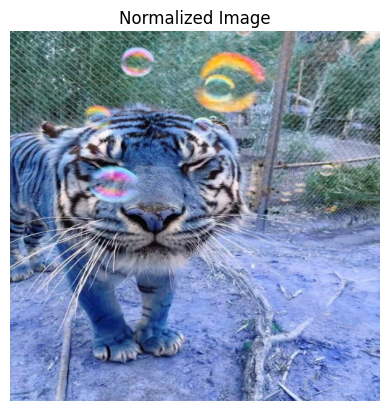

In [33]:
#normalize the image (adjusting pixel values to a common scale—typically between 0 and 1 or -1 and 1—so that data is consistent and easier for models to process.)
img_norm = img / 255.0
# display the image
plt.imshow(img_norm)
plt.axis('off')
plt.title('Normalized Image')
plt.show()

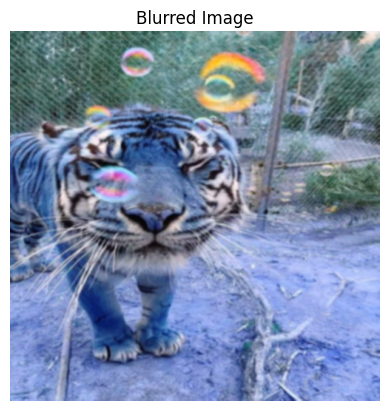

In [34]:
#blur the image ( softening the details by averaging pixel values, which helps reduce noise or focus attention away from certain parts.)
img_blur = cv2.GaussianBlur(img, (5, 5), 0)
# display the image
plt.imshow(img_blur)
plt.axis('off')
plt.title('Blurred Image')
plt.show()

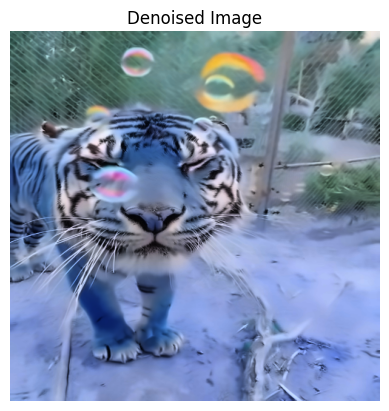

In [35]:
#denoise the image (removing unwanted visual noise like grainy pixels or random specks to make the image clearer and easier to work with.)
img_denoised = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
#display the image
plt.imshow(img_denoised)
plt.axis('off')
plt.title('Denoised Image')
plt.show()

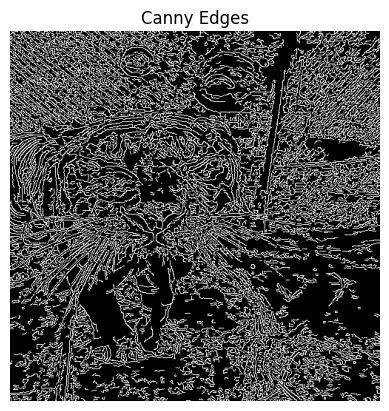

In [36]:
#apply canny edge detector ( finds sharp changes in pixel intensity to highlight the edges of objects in an image.)
img_edges = cv2.Canny(img, 100, 200)
#display the image
plt.imshow(img_edges, cmap='gray')
plt.axis('off')
plt.title('Canny Edges')
plt.show()

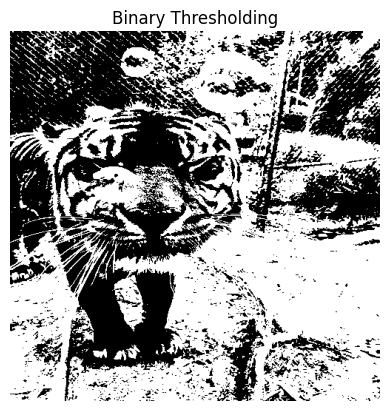

In [37]:
#apply basic binary thresholding (converts an image to black and white by setting pixels above a threshold to 255 and those below it to 0.)
ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
#display the image
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.title('Binary Thresholding')
plt.show()

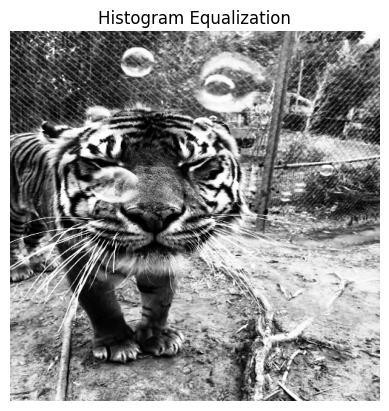

In [38]:
#apply histogram equalization (boosts image contrast by redistributing pixel brightness evenly across the intensity range.)
img_eq = cv2.equalizeHist(img_gray)
#display the image
plt.imshow(img_eq, cmap='gray')
plt.axis('off')
plt.title('Histogram Equalization')
plt.show()

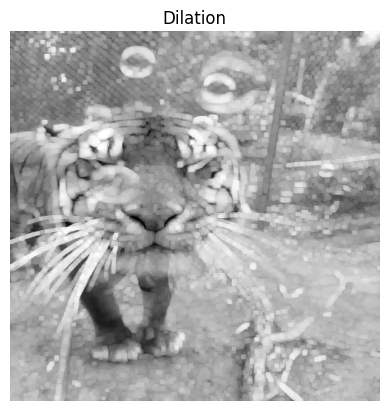

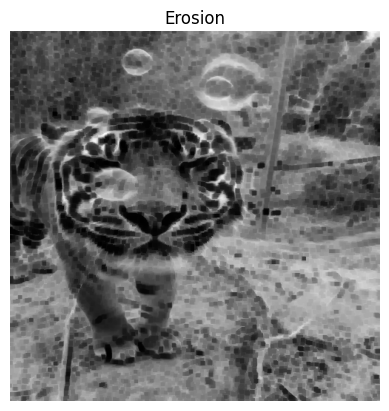

In [39]:
# define kernel (apply effects like blurring, sharpening, or edge detection by sliding over an image and modifying pixel values based on nearby pixels.)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
# erosion (helps clean up noise and separate connected objects.)
img_eroded = cv2.erode(img_gray, kernel, iterations=1)
#dilation ( helps connect broken parts and make objects more visible.)
img_dilated = cv2.dilate(img_gray, kernel, iterations=1)
#display the image
plt.imshow(img_dilated, cmap='gray')
plt.axis('off')
plt.title('Dilation')
plt.show()
# display the image
plt.imshow(img_eroded, cmap='gray')
plt.axis('off')
plt.title('Erosion')
plt.show()

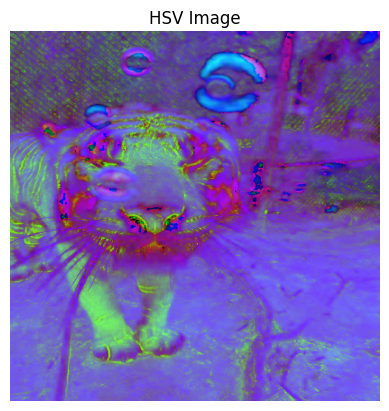

In [40]:
#convert image to HSV (separates color type (hue), intensity (saturation), and brightness (value), making it easier to detect and work with colors in image processing.)
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#display the image
plt.imshow(img_hsv)
plt.axis('off')
plt.title('HSV Image')
plt.show()

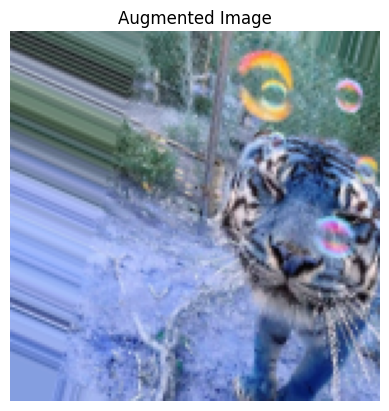

In [41]:
# augmentation (applying changes like rotation, flipping, zooming or brightness adjustment)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)

img_array = cv2.resize(img, (150,150))  # Resize for augmentation
img_array = np.expand_dims(img_array, 0)

aug_iter = datagen.flow(img_array)
aug_image = next(aug_iter)[0].astype(np.uint8)

plt.imshow(aug_image)
plt.title("Augmented Image")
plt.axis('off')
plt.show()

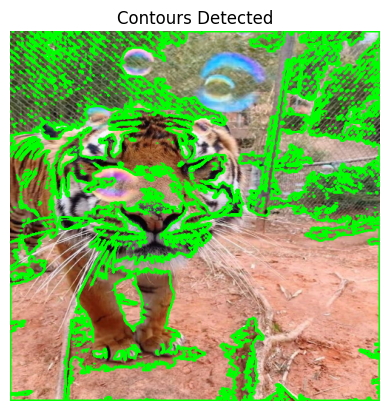

In [42]:
#contour deduction (identifies the outlines of objects in an image by tracing continuous points with similar brightness or color.)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_copy = img.copy()
cv2.drawContours(img_copy, contours, -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.title("Contours Detected")
plt.axis('off')
plt.show()

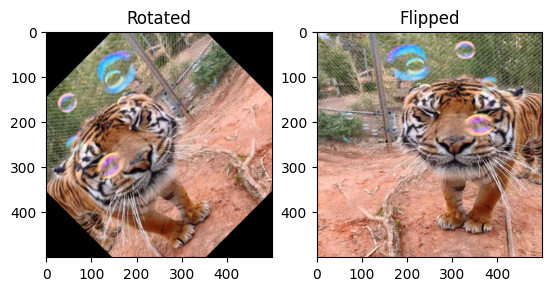

In [43]:
# Rotate
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))

# Flip
flipped = cv2.flip(img, 1)  # Horizontal flip

plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)), plt.title("Rotated")
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB)), plt.title("Flipped")
plt.show()

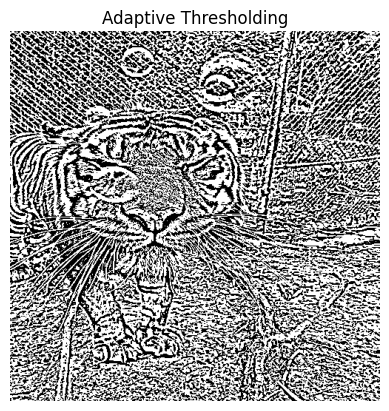

In [44]:
# read and display image
img = mpimg.imread('/content/img.jpg')
plt.imshow(img)
#apply adaptive thresholding ( adjusts the threshold value for each region of an image based on local pixel intensity, making it ideal for images with uneven lighting.)
adaptive_thresh = cv2.adaptiveThreshold(
    img_gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11, 2
)

plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis('off')
plt.show()

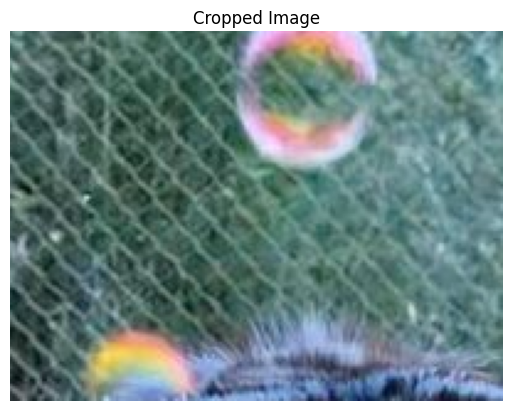

In [45]:
#crop region ( helps focus on the area of interest, removing unnecessary parts to optimize analysis and processing.)
cropped = img[50:200, 100:300]  # [y1:y2, x1:x2]
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.title("Cropped Image")
plt.axis('off')
plt.show()

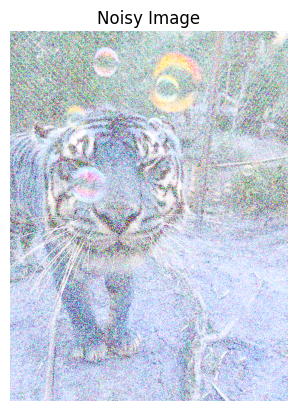

In [46]:
#add noise (to simulate real-world imperfections or augment data for training models.)
import numpy as np

noise = np.random.normal(0, 25, img.shape).astype(np.uint8)
noisy_img = cv2.add(img, noise)

plt.imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.axis('off')
plt.show()

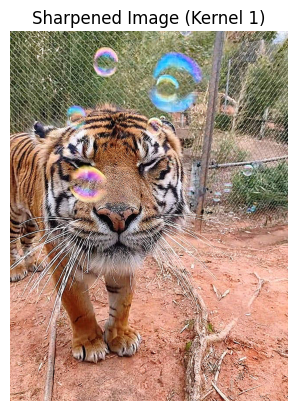

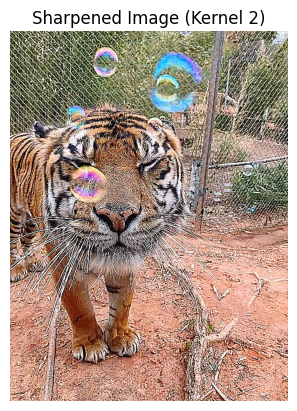

In [48]:
# define sharpening kernel (enhance edges and fine details by emphasizing intensity differences between neighboring pixels.)
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('/content/img.jpg')

# Define sharpening kernel
kernel = np.array([[0, -1,  0],
                   [-1,  5, -1],
                   [0, -1,  0]])

# Apply kernel using filter2D
sharpened = cv2.filter2D(img, -1, kernel)

# Display result
plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image (Kernel 1)')
plt.axis('off')
plt.show()

kernel = np.array([[-1,-1,-1],
                   [-1,9,-1],
                   [-1,-1,-1]])

# apply filter
sharpened = cv2.filter2D(img, -1, kernel)
# show the result
plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
plt.title("Sharpened Image (Kernel 2)")
plt.axis('off')
plt.show()

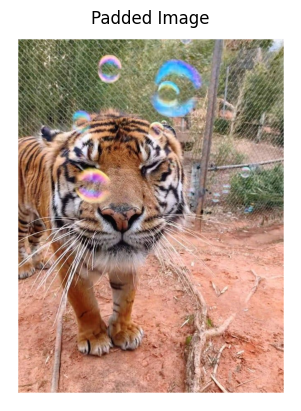

In [49]:
# image padding ( adds extra pixels around the edges of an image to adjust its size or prepare it for further processing like convolution.)
padded = cv2.copyMakeBorder(img, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=[255,255,255])
plt.imshow(cv2.cvtColor(padded, cv2.COLOR_BGR2RGB))
plt.title("Padded Image")
plt.axis('off')
plt.show()

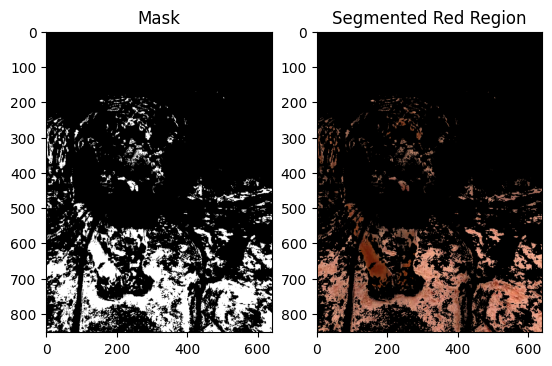

In [50]:
#image masking (highlights or hides specific areas of an image by applying a mask that selects which pixels to keep or discard.)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])
mask = cv2.inRange(hsv, lower_red, upper_red)
result = cv2.bitwise_and(img, img, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Segmented Red Region")
plt.show()